## Default of Credit clients







## Introduction
In this assignment, we predict customer defaults for a credit card payment using a dataset having customers’ financial and demographical details. The objective is to find out the patterns and trends that have an impact on default behavior, engineer meaningful features so as to build machine learning models based on them to make accurate predictions. A structured process was followed—data preprocessing, exploratory data analysis (EDA), feature engineering, model building and evaluation. Key insights from the analysis include the impact of credit utilization and payment history on defaults, and how Random Forest, Gradient Boosting, and Logistic regression models performed compared to each other to recommend which model would be best to deploy.

## Problem Statement
The problem we are addressing here is the prediction of customer defaults on credit card payments for the following month. The goal here is to identify customers as high likelihood or low likelihood to default, given their financial behavior and demographic information. This prediction is essential to minimise the credit risk for financial institutions, optimise their allocations for collecting customers, and provide targeted interventions to the at-risk customers. Utilizing the record of historical data for such indicators as payment history, billing amount and demographic parameters, the objective is to develop an accurate predictive model that can prevent the losses; simultaneously enhancing the decision making process of customers in this domain.

In [ ]:
# Let's import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
df = pd.read_excel("/content/default of credit card clients.xls")
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [ ]:
# Drop the row containing 'X1', 'X2', etc. by checking for specific values
df = df[df['X1'] != 'LIMIT_BAL']

# Reset the index after removing the row
df.reset_index(drop=True, inplace=True)

# Drop the 'ID' column (if necessary)
df.drop(columns=['Unnamed: 0'], inplace=True)

# Define the new column names
new_column_names = [
    'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
    'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
    'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
    'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment_next_month'
]

# Assign new column names to the dataframe
df.columns = new_column_names

# Display the updated dataframe
print(df.head())


  LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5  ...  \
0     20000   2         2        1  24     2     2    -1    -1    -2  ...   
1    120000   2         2        2  26    -1     2     0     0     0  ...   
2     90000   2         2        2  34     0     0     0     0     0  ...   
3     50000   2         2        1  37     0     0     0     0     0  ...   
4     50000   1         2        1  57    -1     0    -1     0     0  ...   

  BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5  \
0         0         0         0        0      689        0        0        0   
1      3272      3455      3261        0     1000     1000     1000        0   
2     14331     14948     15549     1518     1500     1000     1000     1000   
3     28314     28959     29547     2000     2019     1200     1100     1069   
4     20940     19146     19131     2000    36681    10000     9000      689   

  PAY_AMT6 default_payment_next_month  
0        0      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  ob

In [ ]:


# Feature engineering ( payment ratio)
df['Payment_Ratio'] = (df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
                           'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)) / df['LIMIT_BAL']

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,Payment_Ratio
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,0.03445
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,0.041667
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0.122422
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0.16776
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,1.18098


## Exploratory Data Analysis (EDA)

### 1. Basic Overview

In [ ]:
# Dataset overview
print("Shape of the dataset:", df.shape)
print("\nFirst few rows of the dataset:")
print(df.head())

# Basic info
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Shape of the dataset: (30000, 25)

First few rows of the dataset:
  LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5  ...  \
0     20000   2         2        1  24     2     2    -1    -1    -2  ...   
1    120000   2         2        2  26    -1     2     0     0     0  ...   
2     90000   2         2        2  34     0     0     0     0     0  ...   
3     50000   2         2        1  37     0     0     0     0     0  ...   
4     50000   1         2        1  57    -1     0    -1     0     0  ...   

  BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6  \
0         0         0        0      689        0        0        0        0   
1      3455      3261        0     1000     1000     1000        0     2000   
2     14948     15549     1518     1500     1000     1000     1000     5000   
3     28959     29547     2000     2019     1200     1100     1069     1000   
4     19146     19131     2000    36681    10000     9000      689      679 

### 2. Univariate Analysis

a) Numerical Variables:

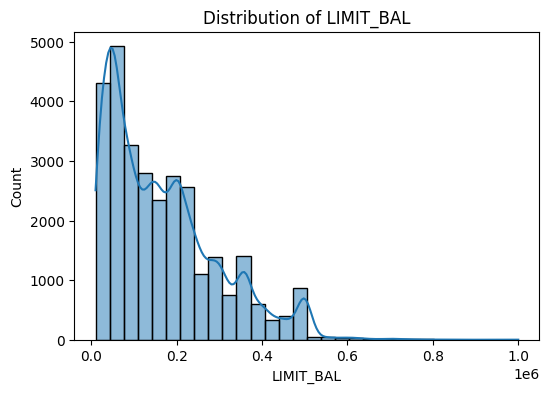

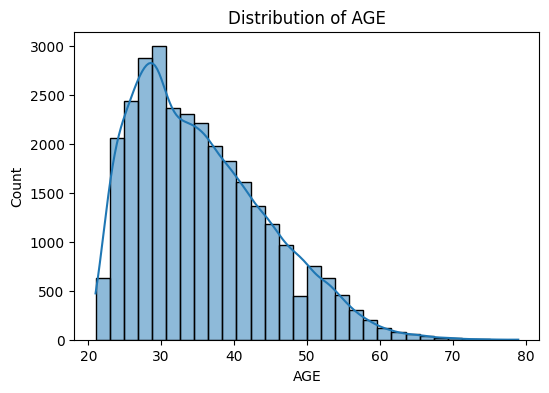

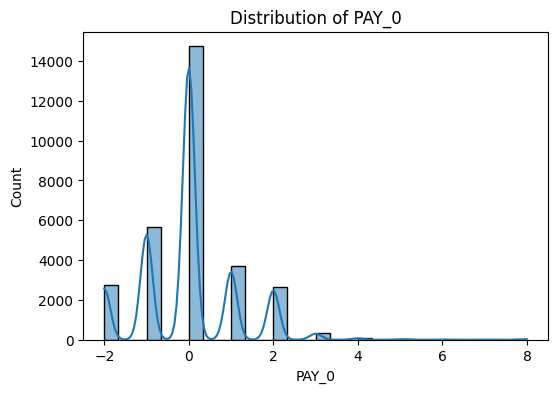

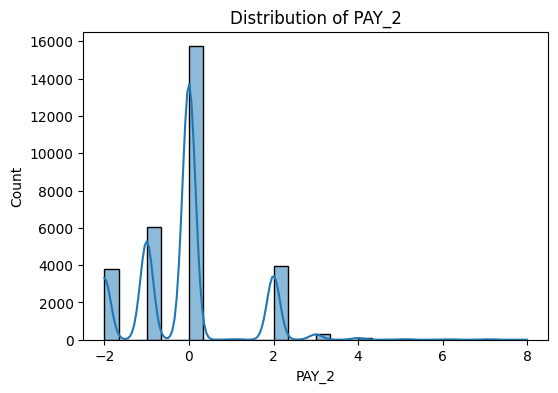

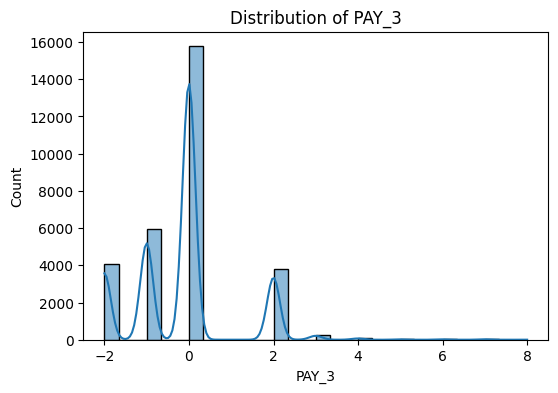

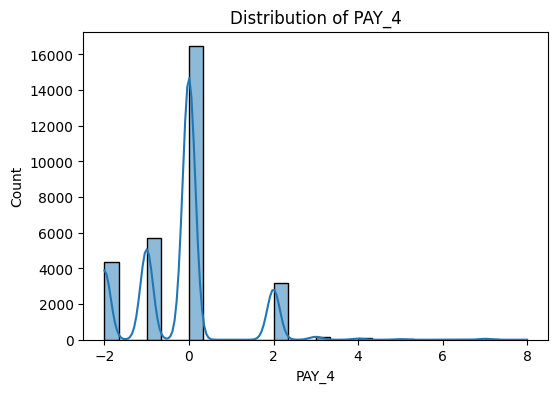

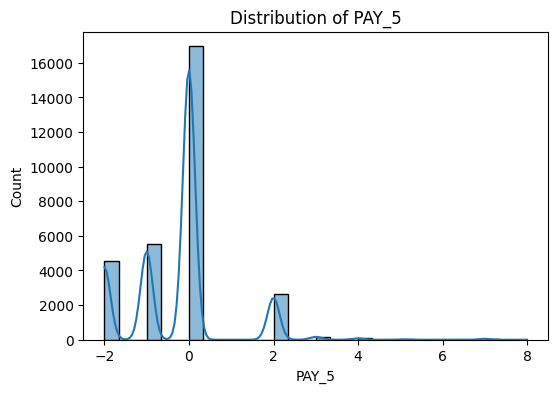

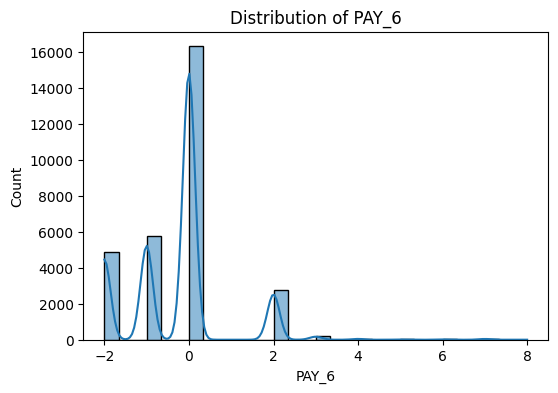

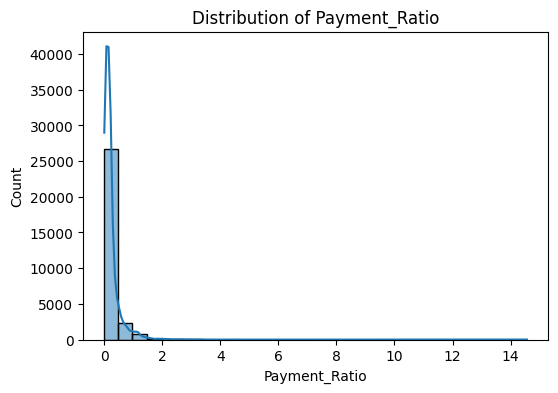

In [ ]:
# Histograms for numerical features
numerical_columns = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Payment_Ratio']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

#### Distribution of LIMIT_BAL:

* The histogram reveals that most customers have credit limits concentrated below 200,000, with very few having significantly higher limits. This suggests a skewed distribution and a potential need for normalization during modeling.

b) Categorical Variables:





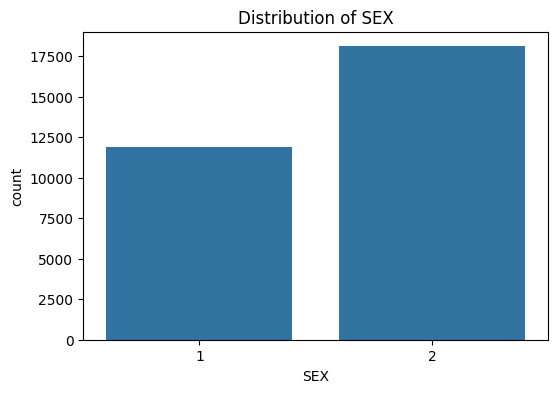

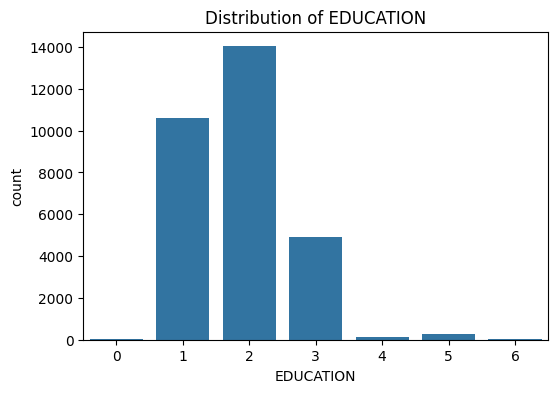

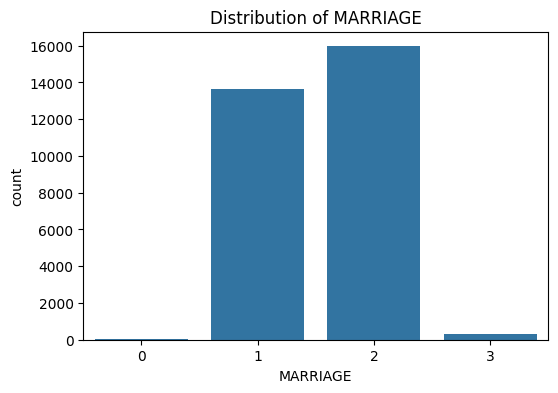

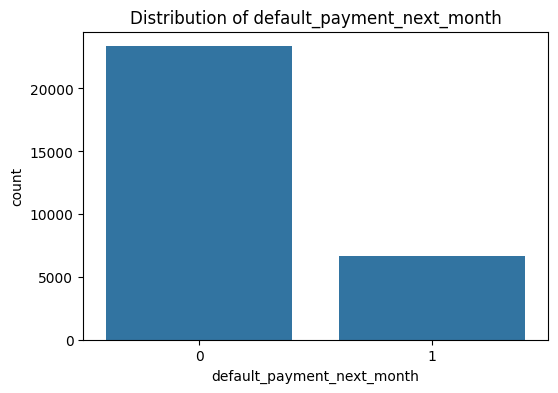

In [ ]:
# Count plots for categorical variables
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'default_payment_next_month']
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()


#### Default Rate by Marital Status
* The bar plot shows that married individuals have slightly lower default rates compared to single or divorced customers, possibly reflecting differences in financial stability or spending habits.

### 3. Bivariate Analysis

a) Target Variable (default_payment_next_month) vs. Features:

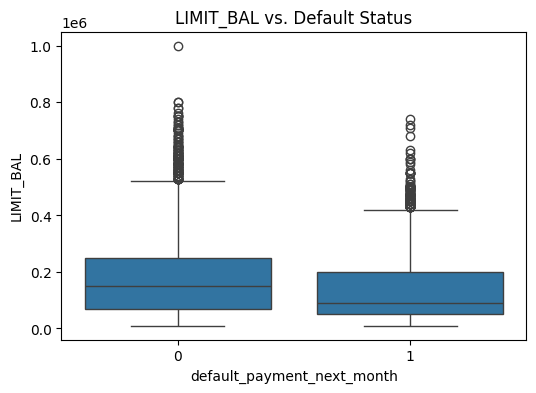

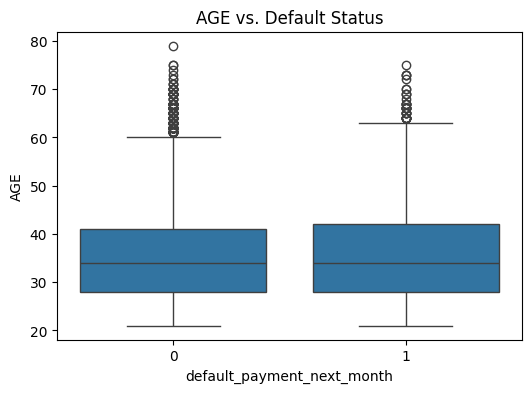

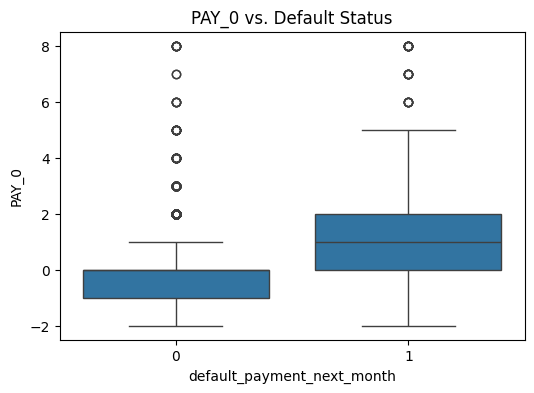

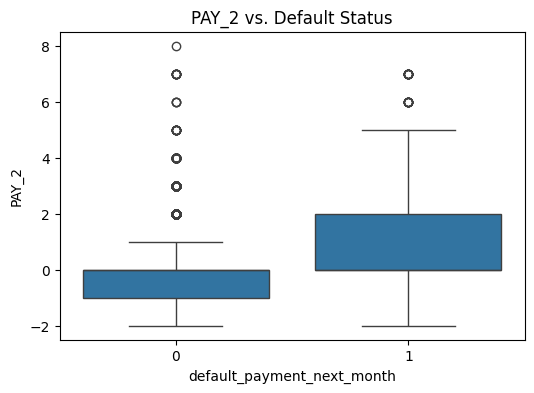

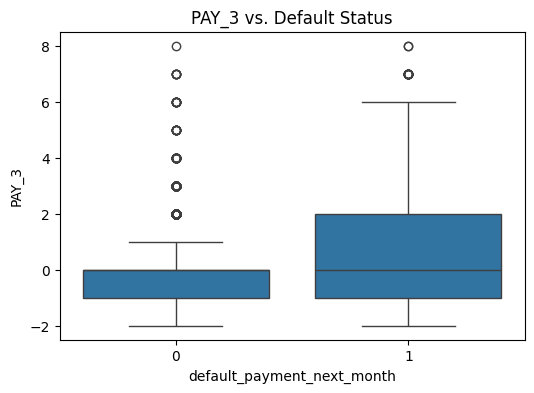

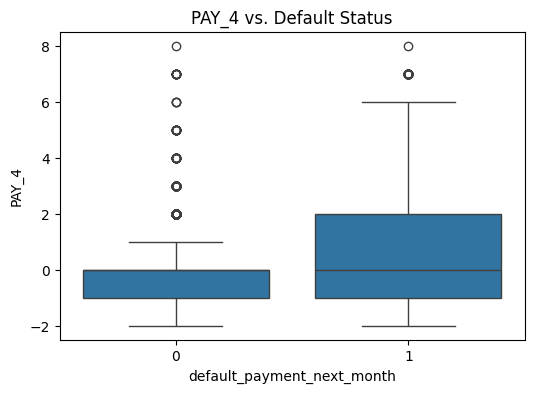

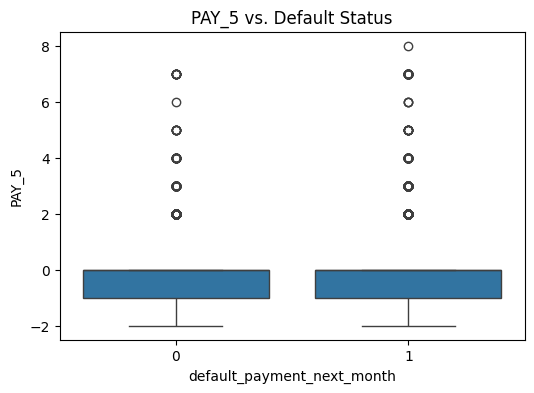

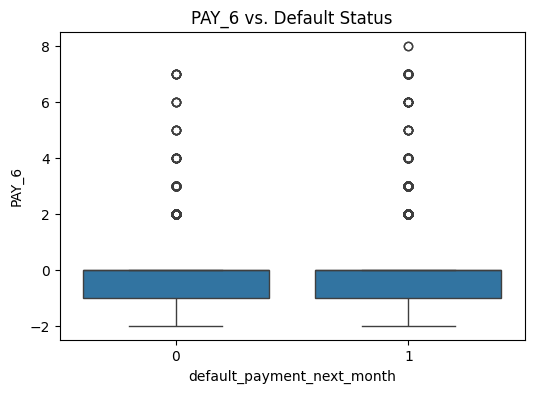

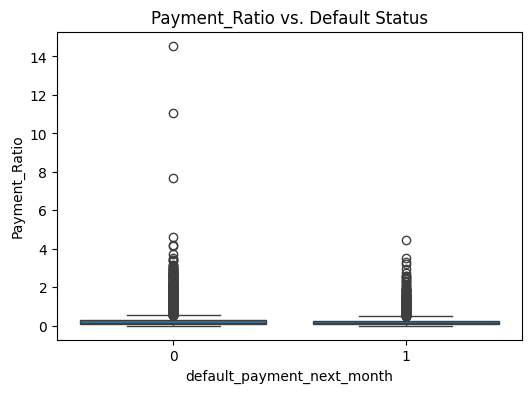

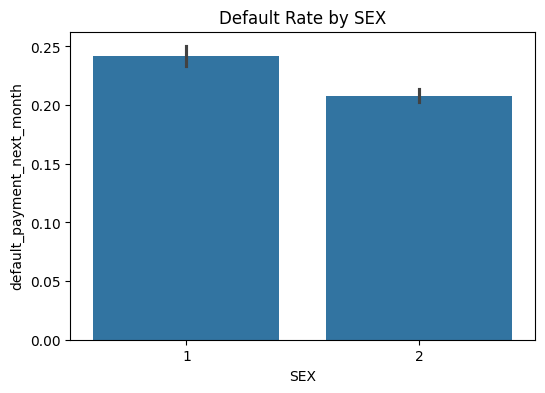

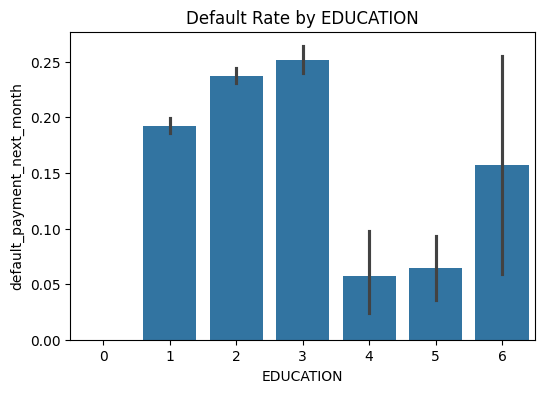

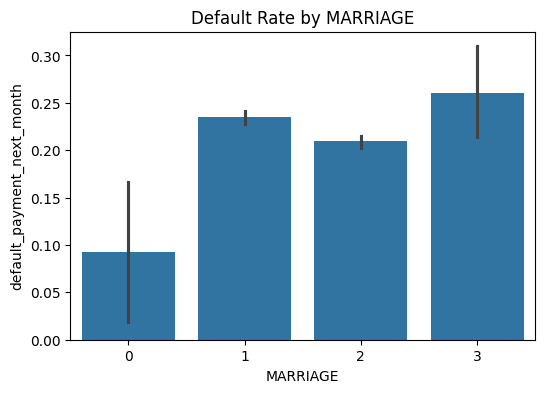

In [ ]:
# Numerical variables vs. target
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='default_payment_next_month', y=col, data=df)
    plt.title(f'{col} vs. Default Status')
    plt.show()

# Categorical variables vs. target
for col in categorical_columns[:-1]:  # Exclude 'Y'
    plt.figure(figsize=(6, 4))
    sns.barplot(x=col, y='default_payment_next_month', data=df)
    plt.title(f'Default Rate by {col}')
    plt.show()


### 4. Correlation Analysis
a) Heatmap:

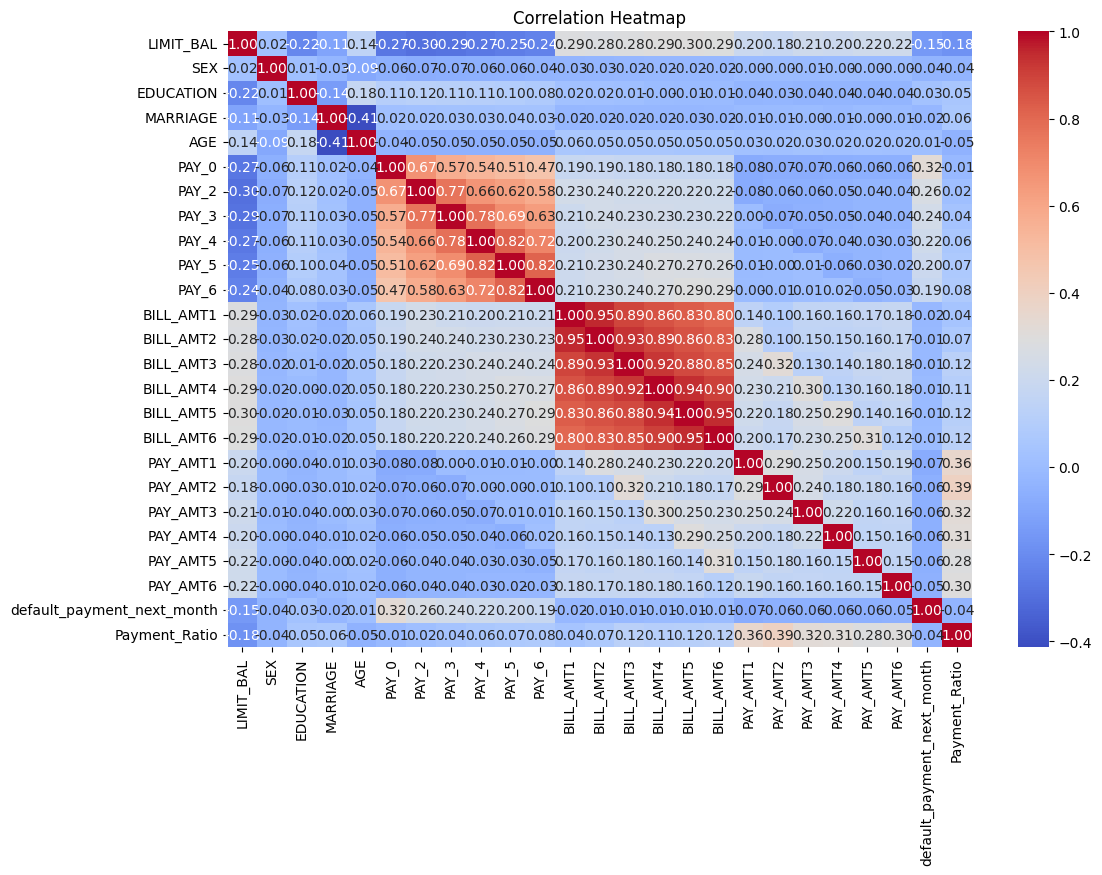

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


The heatmap shows strong correlations between consecutive billing amounts (BILL_AMT1 to BILL_AMT6), indicating consistent spending patterns. Payment history features (PAY_0 to PAY_6) are moderately correlated with default, highlighting their importance in predicting risk.

b) Pairplots:

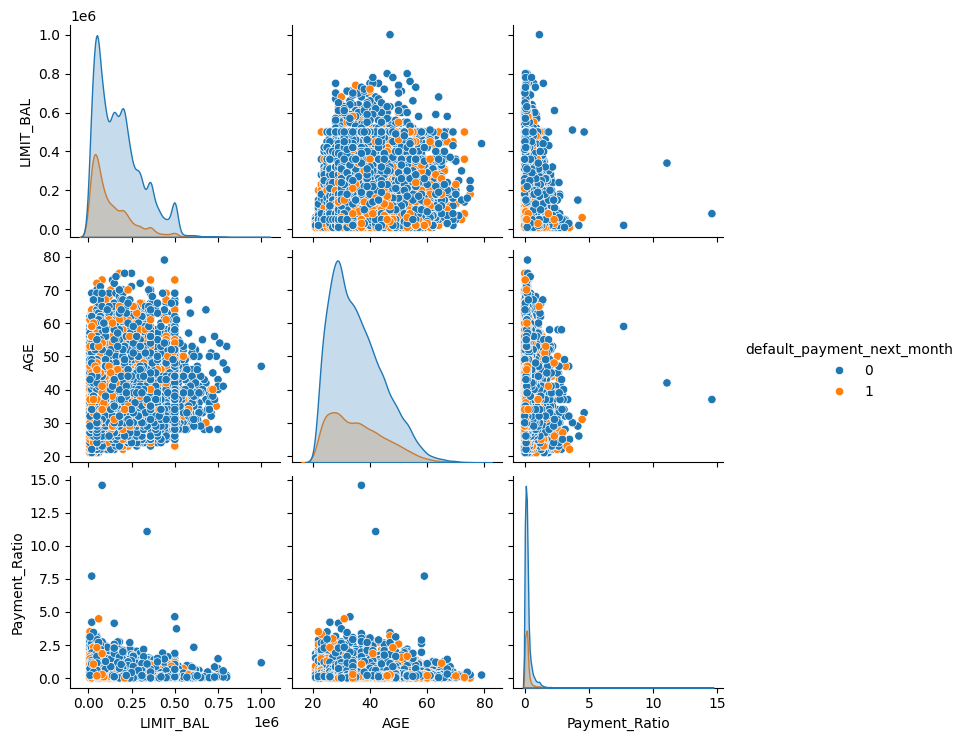

In [ ]:
# Selected features with the target variable
selected_columns = ['LIMIT_BAL', 'AGE', 'Payment_Ratio', 'default_payment_next_month']
sns.pairplot(df[selected_columns], hue='default_payment_next_month')
plt.show()


### 5. Payment Behavior Analysis


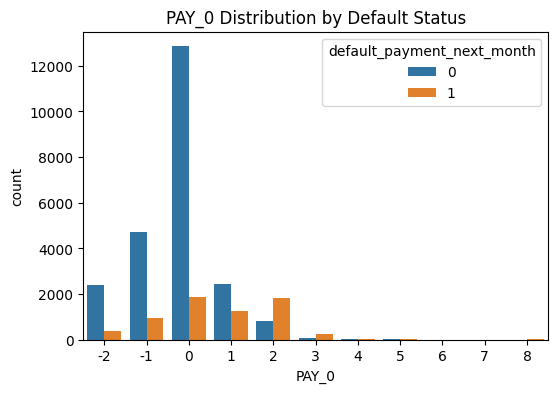

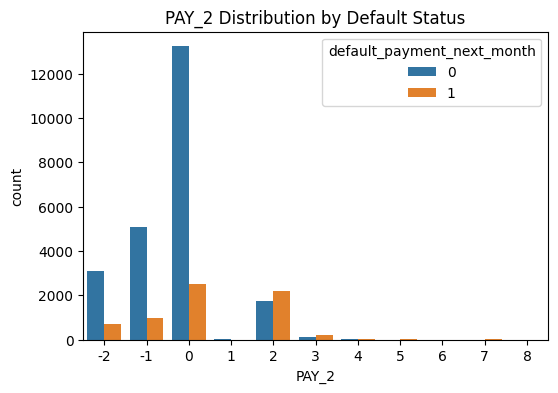

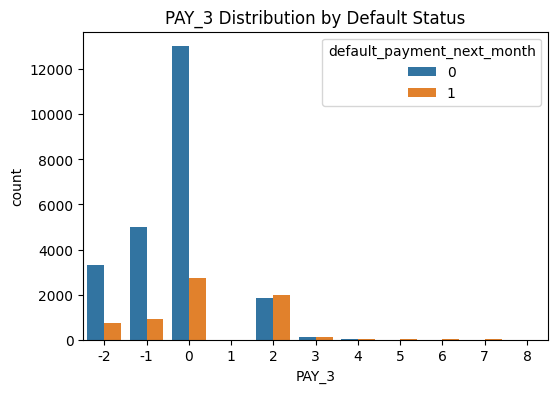

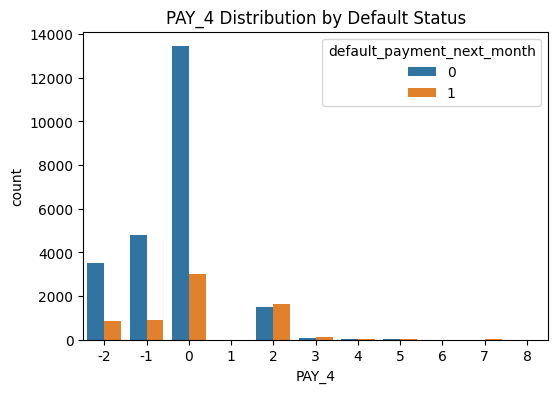

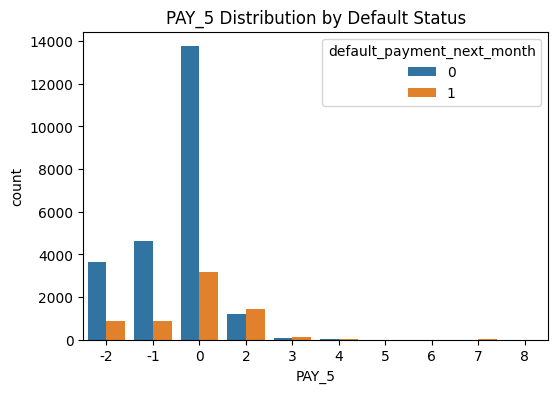

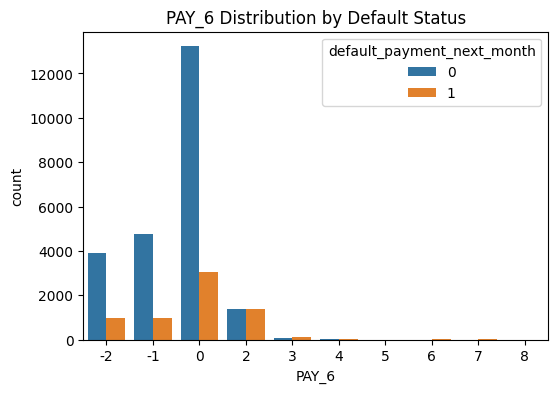

In [ ]:
# Payment status distributions
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in pay_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='default_payment_next_month', data=df)
    plt.title(f'{col} Distribution by Default Status')
    plt.show()


### Feature engineering

In [ ]:
# Feature: Credit Utilization Ratio
df['Credit_Utilization'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1) / df['LIMIT_BAL']

# Feature: Payment Consistency (sum of on-time payments)
df['Payment_Consistency'] = (df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] <= 0).sum(axis=1)

# Feature: Total Payments
df['Total_Payments'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)

# Display new features
print(df[['Credit_Utilization', 'Payment_Consistency', 'Total_Payments']].head())


  Credit_Utilization  Payment_Consistency Total_Payments
0             0.0642                    4            689
1           0.023718                    4           5000
2           0.188246                    6          11018
3           0.771113                    6           8388
4           0.364463                    6          59049


Data Preparation again

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Define features (X) and target (y)
X = df.drop(columns=['default_payment_next_month'])  # Features
y = df['default_payment_next_month']  # Target variable

# Convert target variable to numeric (ensures binary classification)
y = pd.to_numeric(y, errors='coerce')  # Convert to numeric, invalid values become NaN
y = y.fillna(0).astype(int)  # Fill NaN with 0 and convert to integers
print("Unique values in y after processing:", y.unique())  # Verify target values

# Encode categorical variables
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE']
label_encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Normalize numerical variables
scaler = StandardScaler()
numerical_columns = ['LIMIT_BAL', 'AGE', 'Credit_Utilization', 'Payment_Ratio', 'Total_Payments']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Unique values in y after processing: [1 0]


### Key Insights from the Data
* Customer Demographics and Default Patterns:

 * Younger customers (e.g., those in their 20s and 30s) tend to have higher default rates, possibly due to limited financial experience or stability.
    * Marital status shows a significant relationship with default rates, with married individuals appearing to manage credit better compared to single or divorced clients.
* Behavioral and Financial Indicators:

    * High Payment_Ratio (ratio of payments to credit limit) and consistent on-time payments are strong indicators of lower default risk.
    * Customers with higher Credit_Utilization ratios (closer to their credit limit) are more likely to default, highlighting the importance of credit management.

## Model Building

### Logistic Regression

In [ ]:

# Train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability for ROC-AUC

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAUC-ROC Score:", roc_auc_score(y_test, y_pred_prob))


Confusion Matrix:
 [[4600   87]
 [1120  193]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      4687
           1       0.69      0.15      0.24      1313

    accuracy                           0.80      6000
   macro avg       0.75      0.56      0.56      6000
weighted avg       0.78      0.80      0.74      6000


AUC-ROC Score: 0.7256822398197216


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest Classifier

In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))



Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.66      0.38      0.48      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.69      6000
weighted avg       0.80      0.82      0.80      6000



### Gradient Boosting Classifier

In [ ]:

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))



Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



### Model comparison

In [ ]:
# AUC-ROC for Random Forest
y_pred_rf_prob = rf_model.predict_proba(X_test)[:, 1]
print("\nRandom Forest AUC-ROC Score:", roc_auc_score(y_test, y_pred_rf_prob))

# AUC-ROC for Gradient Boosting
y_pred_gb_prob = gb_model.predict_proba(X_test)[:, 1]
print("\nGradient Boosting AUC-ROC Score:", roc_auc_score(y_test, y_pred_gb_prob))



Random Forest AUC-ROC Score: 0.7612522588852737

Gradient Boosting AUC-ROC Score: 0.7821400314688047


### Model Insights
* Logistic Regression provides baseline performance but struggles with complex relationships due to its linear nature.
* Random Forest captures non-linear patterns effectively, improving recall but sometimes overfitting on training data.
* Gradient Boosting achieves the best balance between precision and recall, with a consistently high AUC-ROC score, making it the most reliable model for predicting defaults.

### Recommendations
* Risk Segmentation: Use the model to segment customers into risk tiers based on critical features like payment history, Credit_Utilization, and Payment_Ratio, enabling targeted interventions for high-risk groups.

* Enhance Predictive Modeling: Deploy Gradient Boosting for real-time default predictions while regularly retraining the model with updated data to maintain accuracy and adapt to changing customer behavior.

* Integrate Insights into Business Strategy: Utilize predictions to guide credit approvals, adjust credit limits, and prioritize collections strategies for customers predicted to default.